In [88]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [89]:
# Load Data Set
df = pd.read_csv("data/Video Games Sales(Clean).csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Others,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Others,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Steps:
1. Seperate X and y features
2. Label Encoder
3. Built Pipeline(fro Imputer and Scalling)
4. Train Test Split
5. Initiate Pipeline
6. Train Model
7. Test the Model
8. Evaluate the Model 

In [90]:
X = df.drop(columns=['Rank','Name', 'Global_Sales'])
y = df['Global_Sales']

In [92]:
# Get Categorical Columns
categorical_columns = [var for var in X.columns if X[var].dtype == 'O']
categorical_columns

['Platform', 'Genre', 'Publisher']

In [74]:
# Apply Label Encoder

le = LabelEncoder()

for var in categorical_columns:
    X[var] = le.fit_transform(X[var])

In [75]:
X.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,16,2006.0,10,10,41.49,29.02,3.77,8.46
1,6,1985.0,4,10,29.08,3.58,6.81,0.77
2,16,2008.0,6,10,15.85,12.88,3.79,3.31
3,16,2009.0,10,10,15.75,11.01,3.28,2.96
4,6,1996.0,7,10,11.27,8.89,10.22,1.00


In [76]:
# Built Pipeline

pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [77]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape

((13278, 8), (3320, 8))

In [79]:
# Create Models with default parameters

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'KNN Regressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ada-Boost Regressor': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGB Regressor': XGBRegressor()
}

In [80]:
# Apply Pipeline

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [81]:
X_train.shape

(13278, 8)

In [82]:
r2_matrix = []

def evaluate_model(model ,y_pred_train, y_pred_test, y_train, y_test):
    
    # Results on Train Data Set
    mae_train = round(mean_absolute_error(y_train, y_pred_train), 4)
    mse_train = round(mean_squared_error(y_train, y_pred_train), 4)
    r2_train = round(r2_score(y_train, y_pred_train), 4)
    
    
    # Testing Results    
    mae_test = round(mean_absolute_error(y_test, y_pred_test), 4)
    mse_test = round(mean_squared_error(y_test, y_pred_test), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)
    
    r2 = {
        'Model': model,
        'R2-Score(Train Data)': r2_train,
        'R2-Score(Test Data)': r2_test
    }
    r2_matrix.append(r2)
    
    print(f"""{"-"*50}\n{model}\n{"-"*50}\n     Results on Traing Data: 
        MAE: {mae_train}
        MSE: {mse_train}
        R2-Score: {r2_train}\n\n     Results on Testing Data:
        MAE: {mae_test}
        MSE: {mse_test}
        R2-Score: {r2_test}""")

In [83]:
# Apply Model


for key, value in models.items():
    
    model = value
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    evaluate_model(key, y_pred_train, y_pred_test, y_train, y_test)
    

--------------------------------------------------
Linear Regression
--------------------------------------------------
     Results on Traing Data: 
        MAE: 0.003
        MSE: 0.0
        R2-Score: 1.0

     Results on Testing Data:
        MAE: 0.003
        MSE: 0.0
        R2-Score: 1.0
--------------------------------------------------
Ridge
--------------------------------------------------
     Results on Traing Data: 
        MAE: 0.003
        MSE: 0.0
        R2-Score: 1.0

     Results on Testing Data:
        MAE: 0.003
        MSE: 0.0
        R2-Score: 1.0
--------------------------------------------------
KNN Regressor
--------------------------------------------------
     Results on Traing Data: 
        MAE: 0.0668
        MSE: 0.0464
        R2-Score: 0.9765

     Results on Testing Data:
        MAE: 0.101
        MSE: 0.9529
        R2-Score: 0.7732
--------------------------------------------------
Support Vector Regressor
------------------------------------

In [84]:
r2_results = pd.DataFrame(r2_matrix).sort_values(by='R2-Score(Test Data)', ascending=False)
r2_results

,Model,R2-Score(Train Data),R2-Score(Test Data)
0,Linear Regression,1.0000,1.0000
1,Ridge,1.0000,1.0000
7,Gradient Boosting,0.9987,0.8582
4,Decision Tree,1.0000,0.8429
5,Random Forest,0.9969,0.8243
8,XGB Regressor,0.9999,0.7976
2,KNN Regressor,0.9765,0.7732
6,Ada-Boost Regressor,0.4947,0.5855
3,Support Vector Regressor,0.6724,0.3728


#### **Observation**
- Linear Regression and Ridge is best model, there R2 score is 1.0 for both Train and Test data.

In [85]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

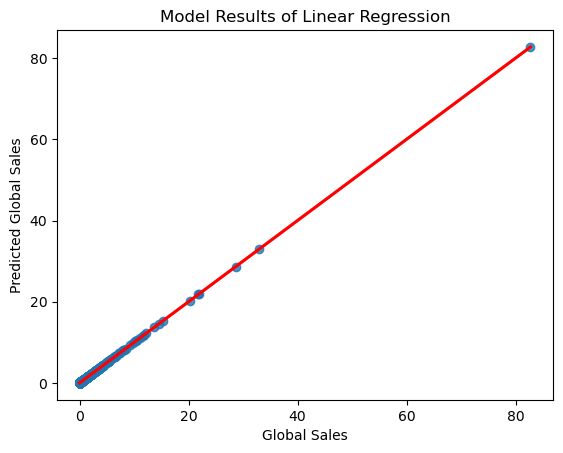

In [86]:
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'})
plt.xlabel('Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Model Results of Linear Regression')
plt.show()

In [ ]:
# from sklearn.preprocessing import LabelEncoder